# Super Wiwino project

Hello and welcom on my little analysis of the Wiwino database !

In this notebook, we will answer the questions asked by our business executives Sam and Leyla. 

The way these business questions have been answered allows room for playing a bit with the parameters, in case similar questions arise in the future. Less work for us, faster answers for you ! :)

In [98]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import pandas as pd

conn = sqlite3.connect("db/vivino.db")
cur = conn.cursor()


## Highlighted wines

In order to increase the sales, the sales department asked us to find ten wines to highlight. Highlight are important to give the clients an idea of how wide our wine database is, and it is definitely very wide !

We went a little bit creative and here is our selection.

In [154]:
highlighted = pd.DataFrame(columns = ['char', 'name'])
query_fizz = """
            SELECT wines.name, 
            vintages.year,
            wines.fizziness, 
            vintages.price_euros
            
                FROM wines
                
            INNER JOIN vintages
                ON wines.id = vintages.wine_id
                
            GROUP BY wines.id
            
            ORDER BY fizziness DESC
            
            LIMIT 1
            """
fizziest = pd.read_sql_query(query_fizz, conn)
fizziest['char'] = 'Fizziest'
highlighted = pd.concat([highlighted, fizziest[['char', 'name']]])

query_sweet = """
            SELECT wines.name, 
            vintages.year,
            wines.sweetness, 
            vintages.price_euros
            
                FROM wines
                
            INNER JOIN vintages
                ON wines.id = vintages.wine_id
                
            GROUP BY wines.id
            
            ORDER BY sweetness DESC
            
            LIMIT 1
            """
sweetest = pd.read_sql_query(query_sweet, conn)
sweetest['char'] = 'Sweetest'
highlighted = pd.concat([highlighted, sweetest[['char', 'name']]])
query_intense = """
            SELECT wines.name, 
            vintages.year,
            wines.intensity, 
            vintages.price_euros
            
                FROM wines
                
            INNER JOIN vintages
                ON wines.id = vintages.wine_id
                
            GROUP BY wines.id
            
            ORDER BY intensity DESC
            
            LIMIT 1
            """
intensest = pd.read_sql_query(query_intense, conn)
intensest['char'] = 'Most intense'
highlighted = pd.concat([highlighted, intensest[['char', 'name']]])
query_complex = """
                SELECT wines.name,
                    vintages.year,
                    SUM(keywords_wine.count) AS complexity,
                    vintages.price_euros
                    
                    FROM wines
                    
                INNER JOIN vintages
                    ON wines.id = vintages.wine_id
                    
                INNER JOIN keywords_wine
                    ON wines.id = keywords_wine.wine_id
                    
                GROUP BY wines.id
                
                ORDER BY complexity DESC
                
                LIMIT 1
                """
complexest = pd.read_sql_query(query_complex, conn)
complexest['char'] = 'Most complex'
highlighted = pd.concat([highlighted, complexest[['char', 'name']]])
query_yeasty = """
                SELECT wines.name,
                    vintages.year,
                    SUM(keywords_wine.count) AS yeastiness,
                    vintages.price_euros
                    
                    FROM wines
                    
                INNER JOIN vintages
                    ON wines.id = vintages.wine_id
                    
                INNER JOIN keywords_wine
                    ON wines.id = keywords_wine.wine_id
                    
                INNER JOIN keywords
                    ON keywords_wine.keyword_id = keywords.id
                    
                WHERE keywords.name = "yeast"
                    
                GROUP BY wines.id
                
                ORDER BY yeastiness DESC
                
                LIMIT 1
                """
yeastiest = pd.read_sql_query(query_yeasty, conn)
yeastiest['char'] = 'Yeastiest'
highlighted = pd.concat([highlighted, yeastiest[['char', 'name']]])
query_tropical = """
                SELECT wines.name,
                    vintages.year,
                    SUM(keywords_wine.count) AS tropicalness,
                    vintages.price_euros
                    
                    FROM wines
                    
                INNER JOIN vintages
                    ON wines.id = vintages.wine_id
                    
                INNER JOIN keywords_wine
                    ON wines.id = keywords_wine.wine_id
                    
                WHERE keywords_wine.group_name = "tropical_fruit"
                    
                GROUP BY wines.id
                
                ORDER BY tropicalness DESC
                
                LIMIT 1
                """
tropicalest = pd.read_sql_query(query_tropical, conn)
tropicalest['char'] = 'Most tropical'
highlighted = pd.concat([highlighted, tropicalest[['char', 'name']]])
query_fruity = """
                SELECT wines.name,
                    vintages.year,
                    SUM(keywords_wine.count) AS fruitiness,
                    vintages.price_euros
                    
                    FROM wines
                    
                INNER JOIN vintages
                    ON wines.id = vintages.wine_id
                    
                INNER JOIN keywords_wine
                    ON wines.id = keywords_wine.wine_id
                    
                WHERE keywords_wine.group_name IN ("tropical_fruit", "citrus_fruit","tree_fruit", "black_fruit", "red_fruit", "dried_fruit")
                    
                GROUP BY wines.id
                
                ORDER BY fruitiness DESC
                
                LIMIT 1
                """
fruitiest = pd.read_sql_query(query_fruity, conn)
fruitiest['char'] = 'Fruitiest'
highlighted = pd.concat([highlighted, fruitiest[['char', 'name']]])
query_old = """
                SELECT wines.name,
                    vintages.year,
                    vintages.price_euros
                    
                    FROM wines
                    
                INNER JOIN vintages
                    ON wines.id = vintages.wine_id
                    
                INNER JOIN keywords_wine
                    ON wines.id = keywords_wine.wine_id
                    
                GROUP BY wines.id
                
                ORDER BY vintages.year
                
                LIMIT 1
                """
oldest = pd.read_sql_query(query_old, conn)
oldest['char'] = 'Oldest'
oldest
highlighted = pd.concat([highlighted, oldest[['char', 'name']]])
query_big = """
                SELECT wines.name,
                    vintages.year,
                    vintages.price_euros,
                    vintages.bottle_volume_ml
                    
                    FROM wines
                    
                INNER JOIN vintages
                    ON wines.id = vintages.wine_id
                    
                INNER JOIN keywords_wine
                    ON wines.id = keywords_wine.wine_id
                    
                GROUP BY wines.id
                
                ORDER BY vintages.bottle_volume_ml
                
                LIMIT 1
                """
biggest = pd.read_sql_query(query_big, conn)
biggest['char'] = 'Biggest bottle'
highlighted = pd.concat([highlighted, biggest[['char', 'name']]])
query_best = """
            SELECT wines.name, 
            vintages.year,
            wines.ratings_average AS rating, 
            vintages.price_euros
            
                FROM wines
                
            INNER JOIN vintages
                ON wines.id = vintages.wine_id
                
            GROUP BY wines.id
            
            ORDER by rating DESC
            
            LIMIT 1
            """
best = pd.read_sql_query(query_best, conn)
best['char'] = 'Best rated'
highlighted = pd.concat([highlighted, best[['char', 'name']]])
query_vp = """
            SELECT wines.name,
            vintages.year, 
            wines.ratings_average, 
            AVG(vintages.price_euros) as price, 
            wines.ratings_average/vintages.price_euros as value_price
                FROM wines
            INNER JOIN vintages
                ON wines.id = vintages.wine_id
            ORDER BY value_price DESC
            LIMIT 1
            """
best_vp = pd.read_sql_query(query_vp, conn)
best_vp['char'] = 'Best value/price'
highlighted = pd.concat([highlighted, best_vp[['char', 'name']]])
highlighted.reset_index(drop = True)

,char,name
0,Fizziest,Les Riceys Cuvée Cyriès Brut Millesimé Champagne
1,Sweetest,Aszú 6 Puttonyos Tokaj
2,Most intense,Red Blend
3,Most complex,Tignanello
4,Yeastiest,Brut Champagne
5,Most tropical,Sauternes
6,Fruitiest,Sassicaia
7,Oldest,Ginés Liébana Pedro Ximénez
8,Biggest bottle,Vin Santo di Montepulciano
9,Best rated,Batard-Montrachet Grand Cru


## On which country should the sales focus ?

In order to increase the sales, the wiwino company will focus  on one particular country more than the other in the next year. We came up with a metric we called *thirstiness* (thanks to my collegue Brian Daza), which is how many users each country has, over how any wines are produced in that country. That is, how thirsty these people are for wines !

In [155]:
query_most_wines = """
                    SELECT name, SUM(users_count)/SUM(wines_count) as thirstiness
                        FROM countries
                    GROUP BY name
                    ORDER BY 2 DESC
                    LIMIT 5
                    """

top_countries_wines = pd.read_sql_query(query_most_wines, conn)
top_countries_wines

,name,thirstiness
0,États-Unis,60
1,Suisse,47
2,Roumanie,33
3,Portugal,28
4,Israël,27


Our number one target should be the United States. This country is known for having a huge love of wine, particularly French wine because of its long history and poweful notion of "terroir". Though they have big wine producing regions such as California, Oregon, Washington and New York, none of these have the precious "terroir" that USA drinkers are looking after so much.

Switzerland is also a notable target. Being sandwitched between France and Italy, the wine culture is very strong there too. But it is a primarily mountainous region mostly not suitable for wine production which requires low-ish altitudes and a hilly landscape.

## Flavor explorer

A subset of clients who like the following tastes have been identified : coffee, toast, green apple, cream, and citrus. As wine drinkers ourselves, this set of tastes distinctly reminds us of a *lemon meringue pie*. This often happens in creamy, slighlty tart, sometimes fizzy, white wines and this happens to be a type of wine I'm also in love with.

The flavors below have been initialized with the *lemon meringue pie* flavors.

But feel free to select others to see the results ! There are 450 flavors in total so there's room for exploring.

To select several, press ctrl and click the flavors you want. If you want the wines displayed to ONLY have the flavors you selected, toggle *Exclusive* on, otherwise it will display wines with the flavors you chose among others. By default, *Exclusive* is on.

I would like to thank my collegue Luca Vàrhegyi for the help on this bit of code.

In [322]:
query_subtastes = """
                SELECT DISTINCT keywords.name
                FROM keywords
                """
subtastes = pd.read_sql_query(query_subtastes, conn)
select_tastes = widgets.SelectMultiple(
    options=subtastes.name.to_list(),
    value=["toast", "coffee", "green apple", "cream", "citrus"],
    #rows=10,
    description='Flavors',
    disabled=False
)

exclusive = widgets.ToggleButton(
    value=True,
    description='Exclusive',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

display(select_tastes)
display(exclusive)

SelectMultiple(description='Flavors', index=(398, 110, 184, 116, 99), options=('5-spice powder', 'acacia', 'ac…

ToggleButton(value=True, description='Exclusive', icon='check', tooltip='Description')

When ready, run the cell below.

In [318]:
if len(select_tastes.value) == 1:
    stval = f"('{select_tastes.value[0]}')"
else:
    stval = select_tastes.value
    
ex = ''
if exclusive.value:
    ex = f'HAVING COUNT(DISTINCT keywords.name) = {len(stval)}'

query_lemonpie = f"""
                SELECT wines.name, 
                    vintages.year, 
                    vintages.price_euros--, 
                    --GROUP_CONCAT(DISTINCT keywords.name) as tastes
                FROM wines
                
                INNER JOIN vintages
                    ON wines.id = vintages.wine_id
                
                INNER JOIN keywords_wine
                    ON wines.id = keywords_wine.wine_id
                
                INNER JOIN keywords
                    ON keywords_wine.keyword_id = keywords.id
                
                WHERE keywords.name IN {stval} --("toast", "coffee", "green apple", "cream", "citrus")
                    AND keywords_wine.count >= 10
                    
                GROUP BY wines.id
                
                {ex}
                """
lemonpie = pd.read_sql_query(query_lemonpie, conn)
lemonpie

,name,year,price_euros
0,Tenuta Tignanello 'Solaia',1997,1473.75
1,Tignanello,1978,376.25
2,Tenuta Guado al Tasso Bolgheri Superiore,1992,212.50
3,Sassicaia,1970,1270.00
4,Rutherford,2016,265.00
5,Tenuta Nuova Brunello di Montalcino,2001,420.00
6,Hermitage La Chapelle Rouge,2006,310.00
7,Bolgheri Superiore,1986,1173.75
8,Le Serre Nuove,2020,55.95
9,Saint-Julien (Grand Cru Classé),2018,55.50


## Recommended wines per grapes

Here is a little tool that allows to choose a grape (they are classified by most common to less common in the database) and disply the five top wines according to the classification method you chose.

Make you choice here :

In [159]:
query_most_commom_grapes = """
                        SELECT grapes.name, COUNT(grapes.name) grape_name
                        FROM grapes
                        INNER JOIN most_used_grapes_per_country as mugpc
                            ON grapes.id = mugpc.grape_id
                        INNER JOIN countries
                            ON mugpc.country_code = countries.code
                        GROUP BY grapes.name
                        ORDER BY 2 DESC
                        """

most_common_grapes = pd.read_sql_query(query_most_commom_grapes, conn)
most_common_grapes = most_common_grapes.name.to_list()
grapes_choose = widgets.Dropdown(
    options=most_common_grapes,
    description='Grape :',
    disabled=False,
)


classify_by = widgets.RadioButtons(
    options=['Value/price (ascending)', 'Price (ascending)', 'Price (descending)', 'Rating'],
    description='Classify by :',
    disabled=False
)

display(grapes_choose)
display(classify_by)

Dropdown(description='Grape :', options=('Cabernet Sauvignon', 'Merlot', 'Chardonnay', 'Shiraz/Syrah', 'Pinot …

RadioButtons(description='Classify by :', options=('Value/price (ascending)', 'Price (ascending)', 'Price (des…

And execute this cell to display the results.

In [247]:
if classify_by.value == 'Value/price (ascending)' : 
    classify = 'wines.ratings_average/vintages.price_euros DESC'
elif classify_by.value == 'Price (ascending)' :
    classify = 'vintages.price_euros ASC'
elif classify_by.value == 'Price (descending)' :
    classify = 'vintages.price_euros DESC'
elif classify_by.value == 'Rating' :
    classify = 'wines.ratings_average DESC'

query_grape = f"""
            SELECT grapes.name AS grape, 
            wines.name AS wine, 
            vintages.year,
            vintages.price_euros,
            wines.ratings_average AS rating,
            wines.ratings_average/vintages.price_euros *100 as value_over_price
            
            FROM wines
            
            INNER JOIN vintages
                ON wines.id = vintages.wine_id
            
            INNER JOIN regions
                ON wines.region_id = regions.id
                
            INNER JOIN countries
                ON regions.country_code = countries.code
                
            INNER JOIN most_used_grapes_per_country as mugpc
                ON countries.code = mugpc.country_code
                
            INNER JOIN grapes
                ON mugpc.grape_id = grapes.id
                
            WHERE grapes.name = '{grapes_choose.value}'
                        
            GROUP BY wines.id
            
            ORDER BY {classify}
            
            LIMIT 5
            """
grape = pd.read_sql_query(query_grape, conn)
grape

,grape,wine,year,price_euros,rating,value_over_price
0,Weissburgunder,Trittenheimer Apotheke,2019,39.95,4.5,11.264080
1,Weissburgunder,Castellberg Pinot Noir,2019,70.00,4.4,6.285714
2,Weissburgunder,Marmar,2018,109.95,4.5,4.092769
3,Weissburgunder,Schlehdorn Riesling Trocken,2019,122.05,4.4,3.605080
4,Weissburgunder,Hohenmorgen G.C,2017,162.30,4.4,2.711029


## Country Leaderboard

Which country produces the bes wines in the dataset ? 

Here is the leaderboard, by average rating of the wines in each country. We selected the countries that have a minimum of 20 wines encoded, to make sure countries that have one wine do not dominate the leaderboard because their only wine has a good rating.

In [56]:
query_country_leaderboard = """
                            SELECT countries.name, 
                            AVG(wines.ratings_average) as av_rating,
                            COUNT(wines.id) AS nb_wines
                            
                            FROM countries
                            
                            INNER JOIN regions
                                ON countries.code = regions.country_code
                                
                            INNER JOIN wines
                                ON regions.id = wines.region_id
                            
                            GROUP BY countries.name
                            
                            HAVING nb_wines > 20
                            
                            ORDER BY av_rating DESC
                            """
country_leaderboard = pd.read_sql_query(query_country_leaderboard, conn)
country_leaderboard

,name,av_rating,nb_wines
0,États-Unis,4.490541,74
1,Afrique du Sud,4.459091,22
2,France,4.447130,331
3,Espagne,4.443617,94
4,Portugal,4.435714,28
5,Italie,4.430026,383
6,Argentine,4.417391,23


## Taste profile per country

Each country has a different wine tradition. Southern countries are more red wine focuse, and northern countries are white wine focused. This is mainly due to the weather that allows certain types of grapes to grow better than others, but not only. Sometimes a country, like Hungary, has become famous for a particular type of wine (the Tokaji) even if virtually every grape can grow in that region.

In [243]:
query_countries = """
                SELECT name 
                FROM countries
                """
countries = pd.read_sql_query(query_countries, conn).values.tolist()
countries = [item for row in countries for item in row]

country_choose = widgets.Dropdown(
    options=countries,
    value='France',
    description='Country:',
    disabled=False,
)
display(country_choose)

Dropdown(description='Country:', index=1, options=('Italie', 'France', 'États-Unis', 'Espagne', 'Portugal', 'A…

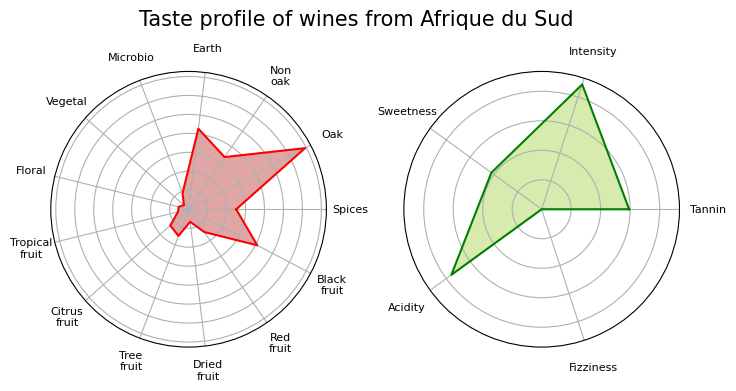

Table of the ten main subtastes and their strength (%)


,subtastes name,%
0,vanilla,8
1,oak,5
2,leather,4
3,tobacco,4
4,smoke,3
5,honey,2
6,chocolate,2
7,plum,2
8,blackberry,2
9,cedar,2


In [246]:
query_wine = f"""
            SELECT DISTINCT keywords_wine.group_name, SUM(keywords_wine.count) as count
            FROM wines
            INNER JOIN keywords_wine
            ON wines.id = keywords_wine.wine_id
            INNER JOIN regions
            ON wines.region_id = regions.id
            INNER JOIN countries
            ON regions.country_code = countries.code
            WHERE countries.name == '{country_choose.value}'
            GROUP BY 1
            ORDER BY 2 DESC
            """

wine = pd.read_sql_query(query_wine, conn)

flavors = [ "spices", "oak", "non_oak", "earth", "microbio", "vegetal", "floral", "tropical_fruit", "citrus_fruit", "tree_fruit", "dried_fruit" ,"red_fruit", "black_fruit"]
wine.group_name = wine.group_name.astype("category")
wine.group_name = wine.group_name.cat.set_categories(flavors)
wine = wine.sort_values(["group_name"])  ## 'sort' changed to 'sort_values'



fig = plt.figure(layout="constrained", figsize = (10,5))
ax1 = fig.add_subplot(131, projection="polar")
# ax1 = fig.add_subplot(122, projection="polar")

# theta has 5 different angles, and the first one repeated
theta1 = np.arange(len(wine) + 1) / float(len(wine)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values1 = wine['count'].values
values1 = np.append(values1, values1[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax1.plot(theta1, values1, color="red", marker=",", label="count")
theta_ticks1 = wine.group_name.str.capitalize().replace('_', '\n', regex=True)
plt.xticks(theta1[:-1], theta_ticks1, color='black', size=8)
ax1.tick_params(pad=7) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax1.fill(theta1, values1, 'firebrick', alpha=0.4)
ax1.set_yticklabels([])




query_tastes = f"""
            SELECT 
            SUM(tannin) as tannin,
            SUM(intensity) as intensity, 
            SUM(sweetness) as sweetness, 
            SUM(acidity) as acidity, 
            SUM(fizziness) as fizziness
            FROM wines
            INNER JOIN regions
                ON wines.region_id = regions.id
            INNER JOIN countries
                ON regions.country_code = countries.code
            WHERE countries.name = '{country_choose.value}'
            GROUP BY countries.code
            """
tastes = pd.read_sql_query(query_tastes, conn)
tastes = tastes.transpose().reset_index().rename(columns = {'index' : 'tastes', 0 : 'count'}).fillna(0)

ax2 = fig.add_subplot(132, projection="polar")

# theta has 5 different angles, and the first one repeated
theta2 = np.arange(len(tastes) + 1) / float(len(tastes)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values2 = tastes['count'].values
values2 = np.append(values2, values2[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax2.plot(theta2, values2, color="green", marker=",", label="count")
theta_ticks2 = tastes.tastes.str.capitalize().replace('_', '\n', regex=True)
plt.xticks(theta2[:-1], theta_ticks2, color='black', size=8)
ax2.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax2.fill(theta2, values2, 'yellowgreen', alpha=0.4)
ax2.set_yticklabels([])





query_subtastes = f"""
            SELECT DISTINCT keywords.name as 'subtastes name',
                (SUM(keywords_wine.count)*100)/(SELECT SUM(ALL keywords_wine.count) 
                                                FROM wines
                                                INNER JOIN keywords_wine
                                                    ON wines.id = keywords_wine.wine_id
                                                INNER JOIN keywords
                                                    ON keywords_wine.keyword_id = keywords.id
                                                INNER JOIN regions
                                                    ON wines.region_id = regions.id
                                                INNER JOIN countries
                                                    ON regions.country_code = countries.code
                                                WHERE countries.name == '{country_choose.value}') as '%'

            FROM wines
            INNER JOIN keywords_wine
                ON wines.id = keywords_wine.wine_id
            INNER JOIN keywords
                ON keywords_wine.keyword_id = keywords.id
            INNER JOIN regions
                ON wines.region_id = regions.id
            INNER JOIN countries
                ON regions.country_code = countries.code
            WHERE countries.name == '{country_choose.value}'
            GROUP BY keywords.id
            ORDER BY SUM(keywords_wine.count) DESC
            LIMIT 10
            """
subtastes = pd.read_sql_query(query_subtastes, conn)


# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
fig.suptitle(f"Taste profile of wines from {country_choose.value}", fontsize = 15, x=0.35, y=0.9)
plt.show()

print('Table of the ten main subtastes and their strength (%)')
subtastes